In [12]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv("BooksDataSet.csv")
df

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...,...
2995,2995,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
2996,2996,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
2997,2997,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
2998,2998,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...


In [4]:
#removing unnanmed cloumn as it is not useful

df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [6]:
df.describe()

,book_id
count,3.000000e+03
mean,9.258275e+06
std,8.375375e+06
min,8.430000e+02
25%,2.944599e+06
50%,6.169495e+06
75%,1.373293e+07
max,3.705402e+07


In [7]:
df.isnull().sum()

book_id      0
book_name    0
genre        0
summary      0
dtype: int64

In [10]:
#cleaning the data

def cleantext(text):

  # removing the'\'

  text=re.sub("'\'","",text)

  # removing special symbols

  text=re.sub("[^a-zA-Z]"," ",text)

  # removing the whitespaces

  text=' '.join(text.split())

  # convert text to lowercase

  text=text.lower()
  return text

df["summary"]=df["summary"].apply(lambda x:cleantext(x))
df["summary"].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

Removing Stop Words

In [18]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\ASUS-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

#removing the stopwords

def removestopwords(text):

  removedstopword=[word for word in text.split() if word not in stop_words]
  return " ".join(removedstopword)

df["summary"]=df["summary"].apply(lambda x:removestopwords(x))
df["summary"].iloc[1]

'book open jason awaken school bu unabl rememb anyth hi past sit next piper mclean leo valdez call name say hi girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one hi coin turn sword use battl storm spirit coach hedg reveal satyr dure fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci wa told vision goddess hera look guy one shoe thi turn jason shoe destroy dure fight jason piper leo told demigod taken back camp half blood meet greek demigod children like themselv leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera ha captur set soon discov enemi work order gaea overthrow god dur

Lemmatizing

In [24]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\ASUS-
[nltk_data]     PC\AppData\Roaming\nltk_data...


True

In [25]:
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
  stemSentence=""
  for word in sentence.split():
    stem=lemma.lemmatize(word)
    stemSentence +=stem
    stemSentence +=" "
  stemSentence = stemSentence.strip()
  return stemSentence

df["summary"]=df["summary"].apply(lambda x:lematizing(x))

In [26]:
df["summary"]

0       drown wednesday first truste among morrow day ...
1       book open jason awaken school bu unabl rememb ...
2       cugel easili persuad merchant fianosth attempt...
3       book open herald mage vanyel return hi countri...
4       taran gurgi return caer dallben follow event t...
                              ...                        
2995    novel numa file kurt austin adventur thi novel...
2996    gilbert kemp dealer special antiqu gun london ...
2997    know deep davey ha alway live shadow hi older ...
2998    stori concern life johnni pasco retir commerci...
2999    first chief henri lee novel open grow town del...
Name: summary, Length: 3000, dtype: object

Stemming

In [27]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stemming(sentence):

  stemmed_sentence=""
  for word in sentence.split():
    stem=stemmer.stem(word)
    stemmed_sentence +=stem
    stemmed_sentence +=" "

  stemmed_sentence=stemmed_sentence.strip()
  return stemmed_sentence


df["summary"]=df["summary"].apply(lambda text:stemming(text))
df["summary"].iloc[1]

'book open jason awaken school bu unabl rememb anyth hi past sit next piper mclean leo valdez call name say hi girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpri everyon includ one hi coin turn sword use battl storm spirit coach hedg reveal satyr dure fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci wa told vision goddess hera look guy one shoe thi turn jason shoe destroy dure fight jason piper leo told demigod taken back camp half blood meet greek demigod child like themselv leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera ha captur set soon discov enemi work order gaea overthrow god dure qu

Encoding

In [31]:
list(df['genre'].unique())

['Fantasy',
 'Science Fiction',
 'Crime Fiction',
 'Historical novel',
 'Horror',
 'Thriller']

In [32]:
books_list=list(df['genre'].unique())
encode=[i for i in range (len(books_list))]
mapper=dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [33]:
df["genre"]=df["genre"].map(mapper)
df["genre"].unique()

array([0, 1, 2, 3, 4, 5])

Model Building

In [34]:
##Count Vectorizer

count_vec=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")

bagofword_vec=count_vec.fit_transform(df["summary"])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245387 stored elements in Compressed Sparse Row format>

In [35]:
test=df["genre"]
xtrain,xtest,ytrain,ytest=train_test_split(bagofword_vec,test,test_size=0.2)

xtrain.shape,xtest.shape

((2400, 1000), (600, 1000))

In [36]:
svc=SVC()
svc.fit(xtrain,ytrain)
svcpred=svc.predict(xtest)
print(metrics.accuracy_score(ytest,svcpred))

0.5816666666666667


In [37]:
mb=MultinomialNB()
mb.fit(xtrain,ytrain)
mbpred=mb.predict(xtest)
print(metrics.accuracy_score(ytest,mbpred))

0.7116666666666667


In [38]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rfpred=rf.predict(xtest)
print(metrics.accuracy_score(ytest,rfpred))

0.63


Model Building_2

Changing from Countvectorizer to TFIDF vectorizer

In [40]:
#Labeling each genre with an unique number

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(df["genre"])

xtrain,xtest,ytrain,ytest=train_test_split(df["summary"],y,test_size=0.2,random_state=557)

xtrain.shape,xtest.shape

((2400,), (600,))

In [41]:
#Performing TF-idf

tfidf_vectorizer= TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain_tfidf=tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xtest_tfidf=tfidf_vectorizer.transform(xtest.values.astype('U'))


In [44]:
svc=SVC()
svc.fit(xtrain_tfidf,ytrain)
svcpred=svc.predict(xtest_tfidf)
print(metrics.accuracy_score(ytest,svcpred))

0.775


In [46]:
mb=MultinomialNB()
mb.fit(xtrain_tfidf,ytrain)
mbpred=mb.predict(xtest_tfidf)
print(metrics.accuracy_score(ytest,mbpred))

0.78


In [47]:
rf=RandomForestClassifier()
rf.fit(xtrain_tfidf,ytrain)
rfpred=rf.predict(xtest_tfidf)
print(metrics.accuracy_score(ytest,rfpred))

0.6516666666666666


Testing the Model

In [48]:
def test(text,model):

  text=cleantext(text)
  text=removestopwords(text)
  text=lematizing(text)
  text=stemming(text)

  text_vector=tfidf_vectorizer.transform([text])
  predicted=model.predict(text_vector)
  return predicted


ans=df["summary"].apply(lambda text:test(text,mb))

ans

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [1]
2996    [5]
2997    [5]
2998    [5]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [50]:
predicted_genres=[]

for i in range(len(ans)):

  index_val=ans[i][0]
  predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])

In [51]:
predicted_genres

['Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Thriller',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Horror',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',


In [52]:
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [54]:
#mapping the training genre as well

newmap=dict([(value,key) for key,value in mapper.items()])
newmap

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [56]:
df["Actual Genre"]=df["genre"].map(newmap)
df["Predicted_genre"]=np.array(predicted_genres)
df.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [57]:
df=df[['book_name','summary','Actual Genre','Predicted_genre']]
df

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Science Fiction
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know deep davey alway live shadow older brothe...,Thriller,Thriller
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Thriller


In [58]:
dict(Counter(df["Actual Genre"].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [60]:
dict(Counter(df["Predicted_genre"].values))

{'Fantasy': 462,
 'Science Fiction': 536,
 'Thriller': 477,
 'Horror': 504,
 'Historical novel': 501,
 'Crime Fiction': 520}

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Historical novel'),
  Text(5, 0, 'Crime Fiction')])

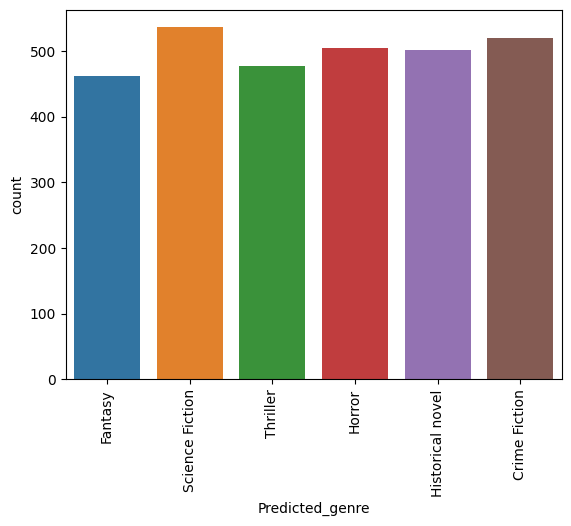

In [63]:
sns.countplot(x=df["Predicted_genre"])
plt.xticks(rotation='vertical')

In [64]:
#saving the model

import pickle
file=open("bookgenremodels.pkl",'wb')
pickle.dump(mb,file)
file.close()

In [65]:
df["summary"].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

In [66]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000)

In [67]:
file=open('tfidfvector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()